**Ned's fizzbuzz**

Hi guys, I hope this is along the lines of what you are looking for.

To run the project you should just need to run ./run_fizzbuzz from your terminal. It needs docker-compose to be installed and might need sudo permissions.

Here is a description of what I did.

I created a few different containers: producer, myqueuer, receiver, redis and mongodb.

- **Redis**: pulls an image of a redis server

- **mongodb**: pulls an image of a mongodb server

- **producer**: produces an HTTP post request to **myqueuer** once every 10 ms for 100ms, then waits 900 ms and repeates. The HTTP request consists of a number (increases sequentially) and the time it was sent.

- **myqueuer**: this runs as a flask app to make getting http requests easy. connects to the **redis** server, fetches the HTTP request from producer, then queues an HTTP request of the message to **receiver**

- **receiver**: also runs as a flask app. if it receives a POST request from **myqueuer** it parses the data into a dict which it saves to **mongodb** along with the time it was received and the latency (t_received - t_sent). If it receives a GET request it pulls the collection of messages from mongodb and averages the latency of the last ten messages. It posts these numbers to a flask page accessible from your machine's localhost which updates roughly eery second.

Here is an image of my terminal showing myqueuer receiving the messages which is then received by receiver. It also shows the most recent mongodb entry, which seemed like the easiest way to show that it was saving the data properly. The mongodb entries are printed by receiver, which get grouped together due to the relatively high rate of requests, I believe.
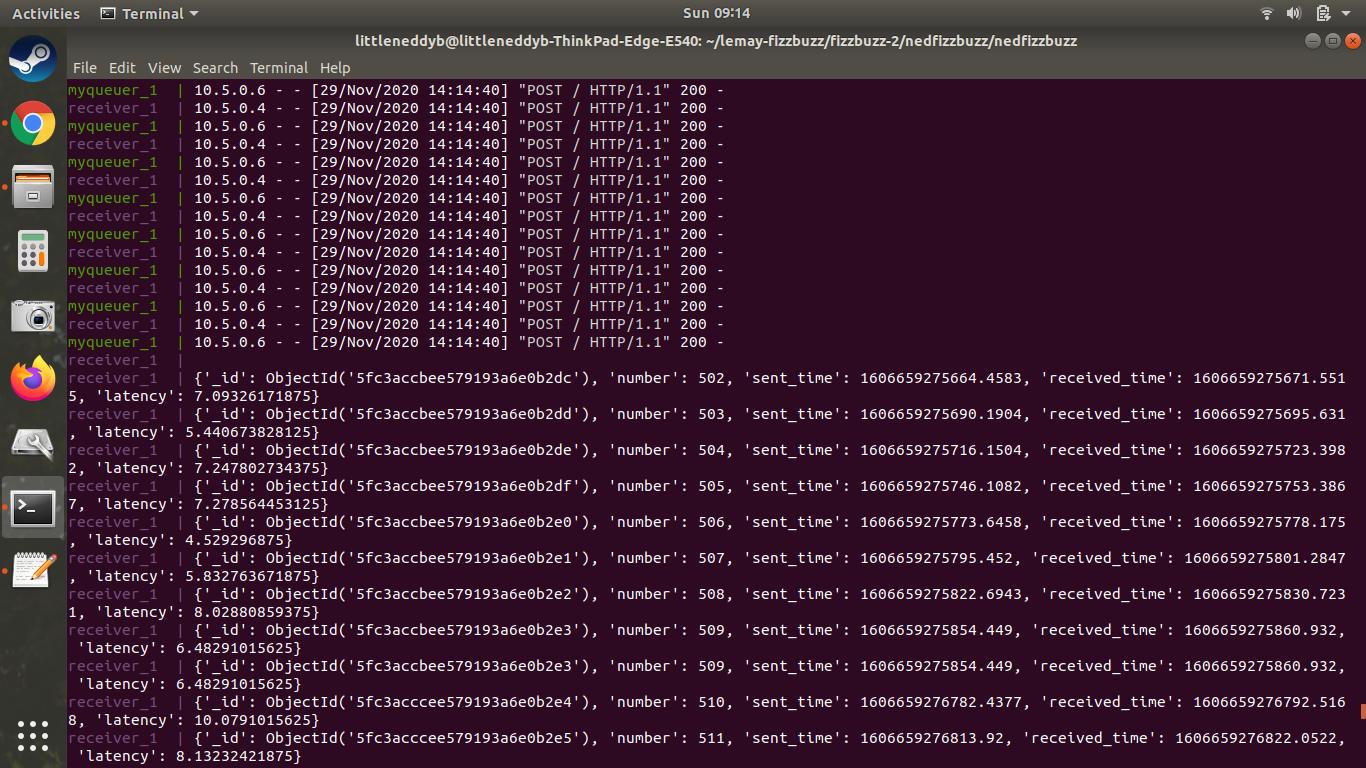
I have also attached a screenshot of what the flask page looks like. 
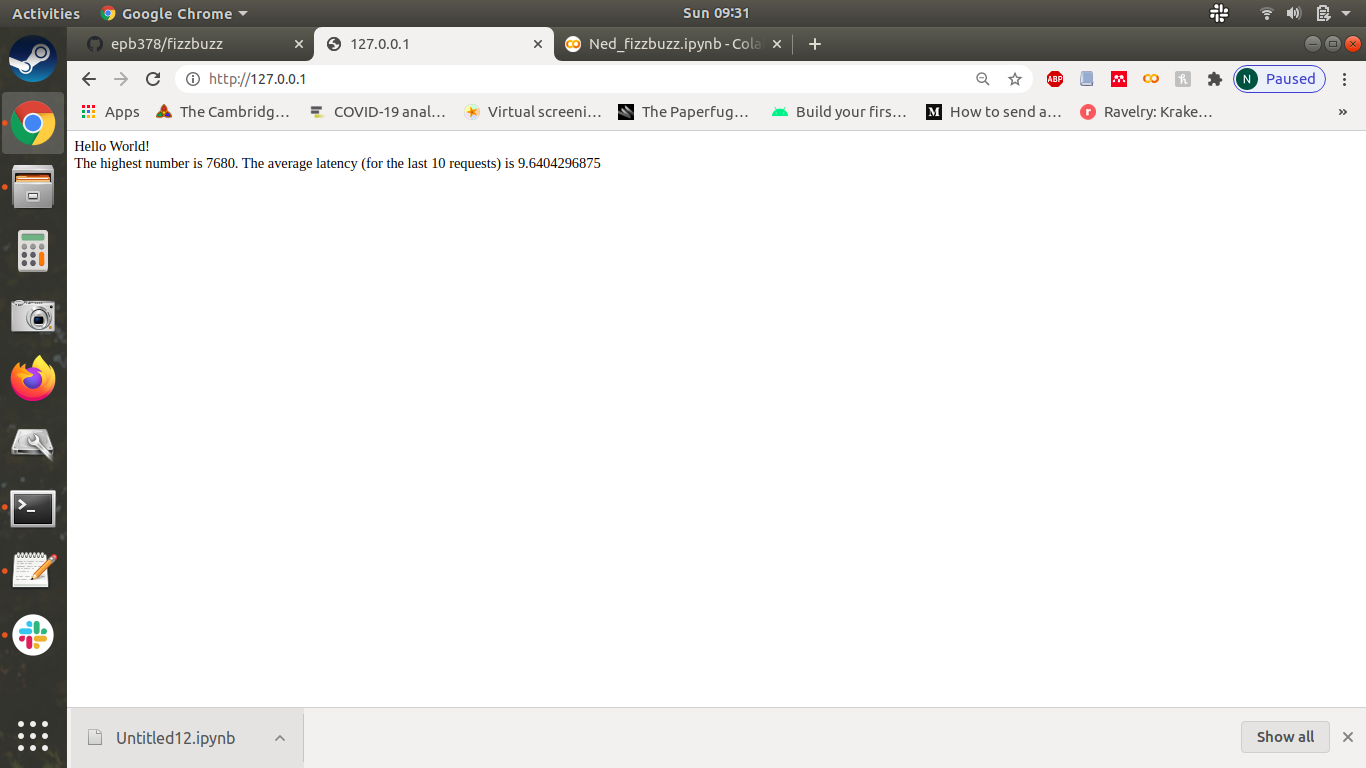
All of this is run created with docker-compose, which is what I think you meant by the last point. I had a look at doing docker-in-docker kinds of things, but I saw a bunch of blog posts saying not to do that, although I may have misunderstood.
